Task #2
=======

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy.special import kolmogorov

import math

#_______________________________from_task1______________________________________
def gen_bernulli(p, *shape):
    """Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bern(n,p)"""
    return 1*(np.random.rand(*shape) < p)
#_______________________________________________________________________________

***Goal:***
* $\delta \sim \mathrm{Cant}$
* $F(\delta)$ -- cantor function  

***Implementation:***

* $\delta = \sum\limits_{i=1}^{\infty} \dfrac{2}{3^i}\xi_i$
* $F(\delta) = \sum\limits_{i=1}^{\infty} \dfrac{1}{2^i}\xi_i$

In [3]:
def gen_cantor(n, eps = 0.0000001):
    """Generates random sample [X1, X2,.. X_n] 
    where Xi ~ Cantor(n) to within eps"""
    result = {"sample": [], "cantor function values": []}

    #find N satisfying precision eps,
    #i.e minimal N such that dx = 1/(3^N) is less than epsilon,
    #where dx is mesh step.
    N = math.ceil(-math.log(eps,3))

    #getting cantor random value
    pow_3_list = [2.0/pow(3,i) for i in range(1,N+1)]
    cant_rand = lambda x: np.dot(pow_3_list, x)
    #getting cantor function value corresponding cant_rand value of x
    pow_2_list = [1.0/pow(2,i) for i in range(1,N+1)]
    cant_func = lambda x: np.dot(pow_2_list, x)

    for i in range(n):
        sample = gen_bernulli(0.5,N)
        result["sample"].append(cant_rand(sample))
        result["cantor function values"].append(cant_func(sample))
    
    return result

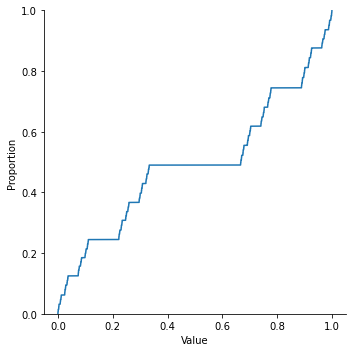

In [4]:
sns.displot(pd.DataFrame({"Value":gen_cantor(10000)["sample"]}), x = "Value", kind = "ecdf")

***Goal:*** $D_n = \sup\limits_{-\infty < x < \infty} 
\left | \hat F_n(x) - F(x) \right |,$
+compute $K(\sqrt{n}D_n)$, where $K(\cdot)$ -- kolmogorov function  

***Implementation:*** $D_n(x_1,\ldots,x_n) = \max\limits_{1\le i \le n} 
\left\{\dfrac{1}{n} - F(x_{(i)}),\: F(x_{(i)}) - \dfrac{i-1}{n}\right\}$

In [5]:
n = 10000
cfval = np.sort(np.array(gen_cantor(n)["cantor function values"]))
Dn = np.max(np.concatenate((1.0/n - cfval,
                                    cfval - [(i-1.0)/n for i in range(1,n+1)]))) 
print(Dn)                                                             
print(kolmogorov(math.sqrt(n)*Dn))  #kolmogorov(x) = 1 - K(x)

0.011579394531250009
0.1368566646303943


***Goal:*** perform Smirnov test for goodness of fit of two samples  

ecdf implementation:

In [6]:
def ecdf(X):
    """Creates ecdf corresponding to random sample X
    X --- numpy array"""

    n = len(X)
    ecdf = lambda x: (1.0/n) * len(X[X < x])
    
    return ecdf

***Goal:*** check if $\delta \sim (1-\delta)$ with Smirnov test  
***Implementation:*** see report 2.2

In [7]:
n, m = 1000, 1000
X, Y = np.sort(np.array(gen_cantor(n)["sample"])), np.sort(1.0 - np.array(gen_cantor(m)["sample"]))
F, G = ecdf(X), ecdf(Y)

Dnm = max(max([i/n - G(X[i-1]) for i in range(1,n+1)]), max([j/m - F(Y[j-1]) for j in range(1,m+1)]))

print(Dnm)
print(kolmogorov(math.sqrt(n*m/(n+m)) * Dnm))

0.027999999999999914
0.8279568614595688


***Goal:*** check if $\delta \sim \delta\bigr|_{[0,\frac{1}{3}]}$ with Smirnov 
test  
***Implementation:*** see report 2.2

In [8]:
n, m = 1000, 20
X = np.sort((1.0/3) * np.array(gen_cantor(n)["sample"]))
Y = np.sort(np.array(gen_cantor(m)["sample"]))
Y = Y[Y <= 1.0/3]
m = len(Y)
F, G = ecdf(X), ecdf(Y)

Dnm = max(max([i/n - G(X[i-1]) for i in range(1,n+1)]), max([j/m - F(Y[j-1]) for j in range(1,m+1)]))

print(Dnm)
print(kolmogorov(math.sqrt(n*m/(n+m)) * Dnm))

0.44327272727272726
0.02780282186509393


***Goal:*** count empirical mean and variance of $\delta$

(<matplotlib.legend.Legend at 0x7fa664b77110>,
 <matplotlib.legend.Legend at 0x7fa664b1ac90>)

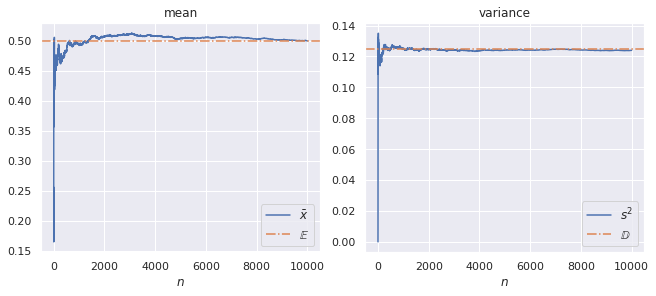

In [102]:
n = 10000
X = np.array(gen_cantor(n)["sample"])
emp_mean = [np.mean(X[0:i]) for i in range(1,n+1)]
emp_var  = [np.var (X[0:i]) for i in range(1,n+1)]

fig0, axs = plt.subplots(ncols=2, nrows=1, figsize=(9,4), constrained_layout=True)
axs[0].plot(emp_mean, label=r'$\bar{x}$'), axs[1].plot(emp_var , label=r'$s^2$')
axs[0].set_title("mean"),                       axs[1].set_title("variance")
axs[0].set_xlabel(r'$n$'),                      axs[1].set_xlabel(r'$n$')
axs[0].axhline(0.5,   linestyle="dashdot", color='C1', label = r'$\mathbb{E}$')
axs[1].axhline(0.125, linestyle="dashdot", color='C1', label = r'$\mathbb{D}$')
axs[0].legend(fontsize=12),                     axs[1].legend(fontsize=12)